# 0.0 - Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics as mt
from sklearn.ensemble import RandomForestClassifier

# 1.0 - Load Data

In [2]:
# Train Dataset
X_train = pd.read_csv("../../../data/classification_X_training.csv")
y_train = pd.read_csv("../../../data/classification_y_training.csv")

# Validation Dataset
X_val = pd.read_csv("../../../data/classification_X_validation.csv")
y_val = pd.read_csv("../../../data/classification_y_validation.csv")

# Test Dataset
X_test = pd.read_csv("../../../data/classification_X_test.csv")
y_test = pd.read_csv("../../../data/classification_y_test.csv")

In [3]:
y_train = y_train.iloc[:, 0]
y_val = y_val.iloc[:, 0]
y_test = y_test.iloc[:, 0]

# 2.0 - Random Forest Classifier

### Parameteres:
- `n_estimators`
- `max_depth`

## 2.1 - Performance for Train Dataset

In [4]:
# Define and Fit Model
RandomForest = RandomForestClassifier(random_state=42)
RandomForest.fit(X_train, y_train)

# Predict
y_pred_train = RandomForest.predict(X_train)

# Performance Metrics
accuracy_train = mt.accuracy_score(y_train, y_pred_train)
precision_train = mt.precision_score(y_train, y_pred_train)
recall_train = mt.recall_score(y_train, y_pred_train)
f1_score_train = mt.f1_score(y_train, y_pred_train)

print(f"Train Accuracy: {accuracy_train}")
print(f"Train Precision: {precision_train}")
print(f"Train Recall: {recall_train}")
print(f"Train F1 Score: {f1_score_train}")

Train Accuracy: 1.0
Train Precision: 1.0
Train Recall: 1.0
Train F1 Score: 1.0


## 2.2 - Performance for Validation Dataset

In [5]:
# Define and Fit Model
RandomForest = RandomForestClassifier(random_state=42)
RandomForest.fit(X_train, y_train)

# Predict
y_pred_val = RandomForest.predict(X_val)

# Performance Metrics
accuracy_val = mt.accuracy_score(y_val, y_pred_val)
precision_val = mt.precision_score(y_val, y_pred_val)
recall_val = mt.recall_score(y_val, y_pred_val)
f1_score_val = mt.f1_score(y_val, y_pred_val)

print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_score_val}")

Validation Accuracy: 0.9652176710962386
Validation Precision: 0.9741999693768183
Validation Recall: 0.9447620461801173
Validation F1 Score: 0.9592552108853795


## 2.3 - Hyperparameters Fine Tunning

### N Estimators

In [6]:
n_estimators = np.arange(10, 310, 10)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [7]:
for i in n_estimators:
    # Train Model
    RandomForest = RandomForestClassifier(n_estimators=i, random_state=42)
    RandomForest.fit(X_train, y_train)

    # Predict
    ypred = RandomForest.predict(X_val)

    # Performance Metrics
    accuracy = mt.accuracy_score(y_val, ypred)
    precision = mt.precision_score(y_val, ypred)
    recall = mt.recall_score(y_val, ypred)
    f1_score = mt.f1_score(y_val, ypred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

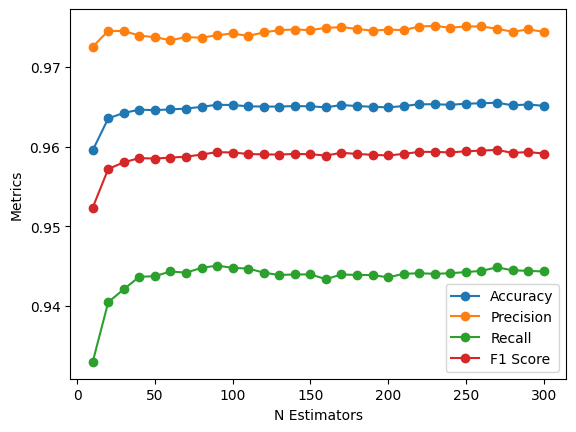

In [8]:
plt.plot(n_estimators, accuracy_list, marker="o", label="Accuracy")
plt.plot(n_estimators, precision_list, marker="o", label="Precision")
plt.plot(n_estimators, recall_list, marker="o", label="Recall")
plt.plot(n_estimators, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("N Estimators")
plt.ylabel("Metrics")
plt.legend()

In [9]:
best_estimator = n_estimators[np.argmax(accuracy_list)]
best_estimator

270

#### Max Depth

In [10]:
max_depth = np.arange(1, 51, 1)

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [11]:
for j in max_depth:
    # Train Model
    RandomForest = RandomForestClassifier(max_depth=j, random_state=42)
    RandomForest.fit(X_train, y_train)

    # Predict
    ypred = RandomForest.predict(X_val)

    # Performance Metrics
    accuracy = mt.accuracy_score(y_val, ypred)
    precision = mt.precision_score(y_val, ypred)
    recall = mt.recall_score(y_val, ypred)
    f1_score = mt.f1_score(y_val, ypred)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

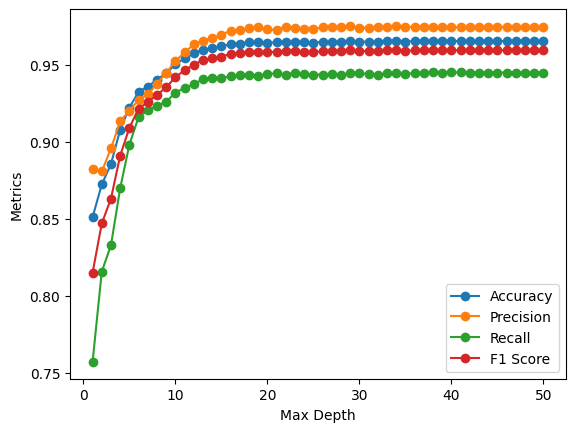

In [12]:
plt.plot(max_depth, accuracy_list, marker="o", label="Accuracy")
plt.plot(max_depth, precision_list, marker="o", label="Precision")
plt.plot(max_depth, recall_list, marker="o", label="Recall")
plt.plot(max_depth, f1_score_list, marker="o", label="F1 Score")
plt.xlabel("Max Depth")
plt.ylabel("Metrics")
plt.legend()

In [13]:
best_depth = max_depth[np.argmax(accuracy_list)]
best_depth

38

## 2.4 - Performance for Test Dataset

In [14]:
# Define Model
RandomForest = RandomForestClassifier(max_depth=best_depth, n_estimators=best_estimator)

# Fit Model
RandomForest.fit(
    pd.concat([X_train, X_val], axis=0), pd.concat([y_train, y_val], axis=0)
)

# Predict
y_pred_test = RandomForest.predict(X_test)

# Performance Metrics
accuracy_test = mt.accuracy_score(y_test, y_pred_test)
precision_test = mt.precision_score(y_test, y_pred_test)
recall_test = mt.recall_score(y_test, y_pred_test)
f1_score_test = mt.f1_score(y_test, y_pred_test)

print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_score_test}")

Test Accuracy: 0.9654346734638706
Test Precision: 0.974356650960493
Test Recall: 0.9461504619445666
Test F1 Score: 0.960046426498817


# 3.0 - Save Results

In [15]:
train_metrics = {
    "Algorithm": "Random Forest",
    "Accuracy": np.round(accuracy_train, 3),
    "Precision": np.round(precision_train, 3),
    "Recall": np.round(recall_train, 3),
    "F1 Score": np.round(f1_score_train, 3),
}
validation_metrics = {
    "Algorithm": "Random Forest",
    "Accuracy": np.round(accuracy_val, 3),
    "Precision": np.round(precision_val, 3),
    "Recall": np.round(recall_val, 3),
    "F1 Score": np.round(f1_score_val, 3),
}
test_metrics = {
    "Algorithm": "Random Forest",
    "Accuracy": np.round(accuracy_test, 3),
    "Precision": np.round(precision_test, 3),
    "Recall": np.round(recall_test, 3),
    "F1 Score": np.round(f1_score_test, 3),
}

pd.DataFrame(train_metrics, index=[0]).to_csv(
    "./train_metrics.csv", mode="a", header=False
)
pd.DataFrame(validation_metrics, index=[0]).to_csv(
    "./validation_metrics.csv", mode="a", header=False
)
pd.DataFrame(test_metrics, index=[0]).to_csv(
    "./test_metrics.csv", mode="a", header=False
)